In [303]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import matplotlib.pyplot as plt

In [304]:
#import Pop_County
df_census2020 = pd.read_csv('DECENNIALPL2020.P1-2024-11-10T174624.csv')
df_population_bycounty = df_census2020.head(1)
df_population_bycounty.columns = df_population_bycounty.columns.str.replace(' County, California', '', regex=False)
county_names = df_population_bycounty.columns[1:]
populations = df_population_bycounty.iloc[0, 1:].replace(',', '', regex=True).astype(int)
df_population_bycounty = pd.DataFrame({
    'County': county_names,
    'Population': populations
}).reset_index(drop=True)
df_population_bycounty = df_population_bycounty.rename(columns={'County': 'CountyName'})
df_population_bycounty.head()
# county_names


,CountyName,Population
0,Alameda,1682353
1,Alpine,1204
2,Amador,40474
3,Butte,211632
4,Calaveras,45292


In [305]:
# import hospital data

# df_hospital = pd.read_csv('ed-volume-and-capacity-2021.csv', encoding = "ISO-8859-1", index_col=[0])
# df_hospital = df_hospital[df_hospital["Category"] == "Asthma"]
# df_hospital_bycounty = df_hospital.groupby('CountyName')['EDDXCount'].sum().reset_index()
# df_hospital_bycounty.head()

df_hospital = pd.read_csv('asthma-emergency-department-visit-rates-by-county-2015_2022.csv', encoding = "ISO-8859-1")
df_hospital_bycounty = df_hospital[df_hospital["STRATA NAME"] == "All ages"]
df_hospital_bycounty = df_hospital_bycounty[df_hospital_bycounty["YEAR"] <= 2019]
df_hospital_bycounty = df_hospital_bycounty.rename(columns={'COUNTY': 'CountyName'})
df_hospital_bycounty = df_hospital_bycounty[["CountyName", "YEAR", "NUMBER OF ED VISITS"]]
df_hospital_bycounty.tail()

,CountyName,YEAR,NUMBER OF ED VISITS
2886,Tulare,2019,"1,996"
2887,Tuolumne,2019,186
2888,Ventura,2019,"2,413"
2889,Yolo,2019,743
2890,Yuba,2019,328


In [306]:
df_hospital_pop_bycounty = pd.merge(df_population_bycounty, df_hospital_bycounty, on='CountyName', how='inner')
df_hospital_pop_bycounty["NUMBER OF ED VISITS"] = df_hospital_pop_bycounty["NUMBER OF ED VISITS"].replace({',': ''}, regex=True)
df_hospital_pop_bycounty["NUMBER OF ED VISITS"] = pd.to_numeric(df_hospital_pop_bycounty["NUMBER OF ED VISITS"])
df_hospital_pop_bycounty["NormalizedVisits"] = df_hospital_pop_bycounty["NUMBER OF ED VISITS"] /  df_hospital_pop_bycounty["Population"] * 10000

df_hospital_pop_bycounty = df_hospital_pop_bycounty[df_hospital_pop_bycounty['NormalizedVisits'] >= 10] # remove 1 outlier 

df_hospital_pop_bycounty.head()

,CountyName,Population,YEAR,NUMBER OF ED VISITS,NormalizedVisits
0,Alameda,1682353,2015,9939.0,59.077970
1,Alameda,1682353,2016,9086.0,54.007690
2,Alameda,1682353,2017,8942.0,53.151746
3,Alameda,1682353,2018,7795.0,46.333914
4,Alameda,1682353,2019,7448.0,44.271327


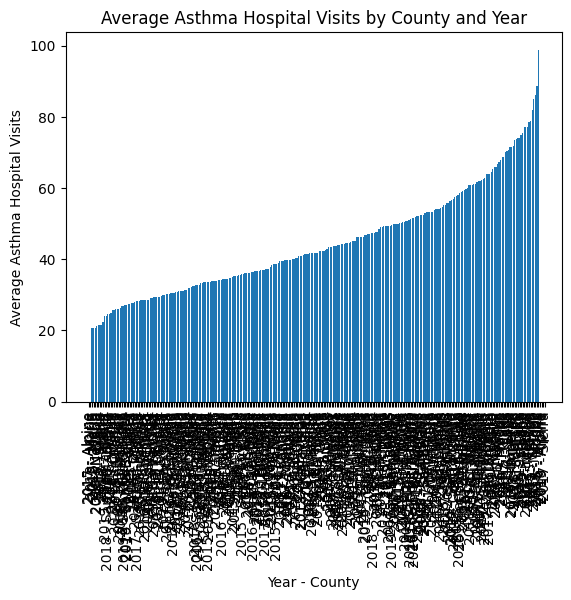

In [307]:
df_hospital_pop_bycounty_sorted['YearCounty'] = df_hospital_pop_bycounty_sorted['YEAR'].astype(str) + ' - ' + df_hospital_pop_bycounty_sorted['CountyName']
df_hospital_pop_bycounty_sorted = df_hospital_pop_bycounty_sorted.sort_values(by='NormalizedVisits', ascending=True)
plt.bar(df_hospital_pop_bycounty_sorted['YearCounty'], df_hospital_pop_bycounty_sorted['NormalizedVisits'])
plt.xticks(rotation=90)
plt.xlabel('Year - County')
plt.ylabel('Average Asthma Hospital Visits')
plt.title('Average Asthma Hospital Visits by County and Year')
plt.show()

In [308]:
# import matplotlib.pyplot as plt

# df_hospital_pop_bycounty_sorted = df_hospital_pop_bycounty.sort_values(by='NormalizedVisits', ascending=True)

# plt.bar(df_hospital_pop_bycounty_sorted['CountyName'], df_hospital_pop_bycounty_sorted['NormalizedVisits'])
# plt.xticks(range(df_hospital_pop_bycounty_sorted['CountyName'].shape[0]), df_hospital_pop_bycounty_sorted['CountyName'], rotation='vertical')
# plt.xlabel('County')
# plt.ylabel('Average Asthma Hospital Visits')
# plt.title('Average Asthma Hospital Visits by County')
# plt.show()

In [326]:
# import air quality data
df_air_2019 = pd.read_csv('air_quality_2019.csv', encoding = "ISO-8859-1", index_col=[0])
# df_air_2019.head()
# print(df_air_2019.head())
df_air_2019 = df_air_2019[['Daily AQI Value', 'County']]
df_air_2019 = df_air_2019.groupby('County')['Daily AQI Value'].mean().reset_index()
df_air_2019['Year'] = '2019'
# print(df_air_2019.head())

df_air_2018 = pd.read_csv('air_quality_2018.csv', encoding = "ISO-8859-1", index_col=[0])
df_air_2018 = df_air_2018[['Daily AQI Value', 'County']]
df_air_2018 = df_air_2018.groupby('County')['Daily AQI Value'].mean().reset_index()
df_air_2018['Year'] = '2018'

df_air_2017 = pd.read_csv('air_quality_2017.csv', encoding = "ISO-8859-1", index_col=[0])
df_air_2017 = df_air_2017[['Daily AQI Value', 'County']]
df_air_2017 = df_air_2017.groupby('County')['Daily AQI Value'].mean().reset_index()
df_air_2017['Year'] = '2017'

df_air_2016 = pd.read_csv('air_quality_2016.csv', encoding = "ISO-8859-1", index_col=[0])
df_air_2016 = df_air_2016[['Daily AQI Value', 'County']]
df_air_2016 = df_air_2016.groupby('County')['Daily AQI Value'].mean().reset_index()
df_air_2016['Year'] = '2016'

df_air_2015 = pd.read_csv('air_quality_2015.csv', encoding = "ISO-8859-1", index_col=[0])
df_air_2015 = df_air_2015[['Daily AQI Value', 'County']]
df_air_2015 = df_air_2015.groupby('County')['Daily AQI Value'].mean().reset_index()
df_air_2015['Year'] = '2015'

# data selection/merging
df_air_by_county = pd.concat([df_air_2015, df_air_2016, df_air_2017, df_air_2018, df_air_2019], axis=0)# Combine all years into one dataframe
df_air_by_county = df_air_by_county.rename(columns={'County': 'CountyName'})
df_air_by_county = df_air_by_county.rename(columns={'Daily AQI Value': 'AverageAnnualAQI'})

df_air_by_county = df_air_by_county[df_air_by_county['AverageAnnualAQI'] <= 100] # remove 1 outlier

df_air_by_county.head()
# print(df_air_by_county)

,CountyName,AverageAnnualAQI,Year
0,Alameda,43.954290,2015
2,Butte,41.676554,2015
3,Calaveras,37.753425,2015
4,Colusa,42.738589,2015
5,Contra Costa,42.250733,2015


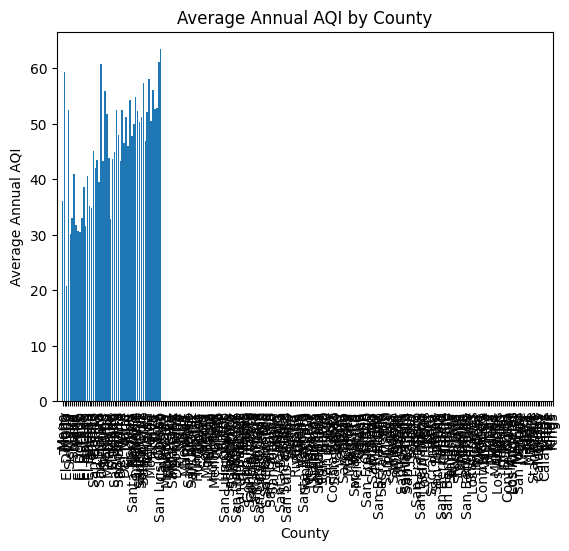

In [310]:
# Bar plot of AQI by county
import matplotlib.pyplot as plt
# plt.bar(df_air_by_county['CountyName'], df_air_by_county['AverageAnnualAQI'])
# plt.xticks(range(df_air_by_county['CountyName'].shape[0]), df_air_by_county['CountyName'], rotation='vertical')
# plt.show()

df_air_by_county_sorted = df_air_by_county.sort_values(by='AverageAnnualAQI', ascending=True)

plt.bar(df_air_by_county_sorted['CountyName'], df_air_by_county_sorted['AverageAnnualAQI'])
plt.xticks(range(df_air_by_county_sorted['CountyName'].shape[0]), df_air_by_county_sorted['CountyName'], rotation='vertical')
plt.xlabel('County')
plt.ylabel('Average Annual AQI')
plt.title('Average Annual AQI by County')
plt.show()


<Axes: xlabel='CountyName', ylabel='AverageAnnualAQI'>

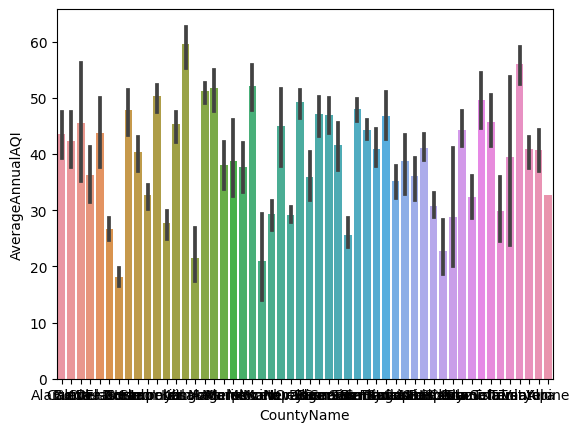

In [311]:
# Bar plot of AQI by county
seaborn.barplot(data = df_air_by_county, x="CountyName", y="AverageAnnualAQI")

In [312]:
# merge AQI and hospital data
df_hospital_aqi = pd.merge(df_hospital_pop_bycounty[["CountyName", "NormalizedVisits"]], df_air_by_county, on='CountyName', how='inner')
df_hospital_aqi.head()

,CountyName,NormalizedVisits,AverageAnnualAQI,Year
0,Alameda,59.07797,43.954290,2015
1,Alameda,59.07797,39.243949,2016
2,Alameda,59.07797,46.097820,2017
3,Alameda,59.07797,51.224222,2018
4,Alameda,59.07797,37.231633,2019


<Axes: xlabel='AverageAnnualAQI', ylabel='NormalizedVisits'>

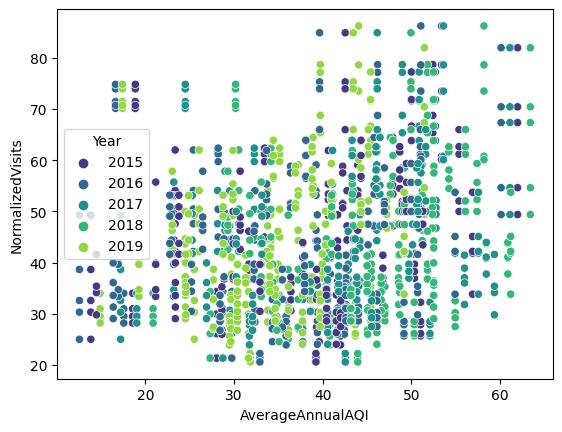

In [322]:
seaborn.scatterplot(data=df_hospital_aqi, x='AverageAnnualAQI', y='NormalizedVisits', hue='Year', palette='viridis')

<Axes: xlabel='AverageAnnualAQI', ylabel='NormalizedVisits'>

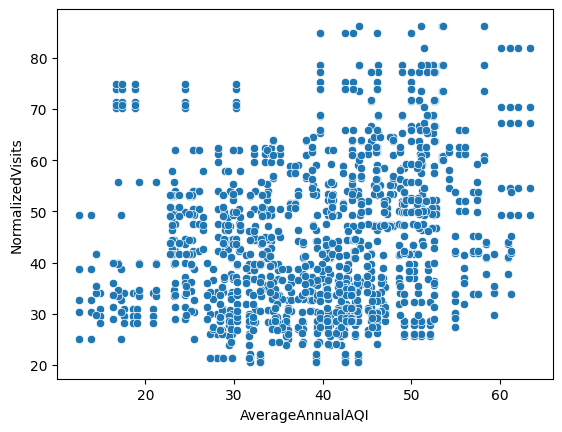

In [313]:
# plot Hospital Visits by AQI per county in 2021
# seaborn.scatterplot(data = df_hospital_aqi, x='AverageAnnualAQI', y='NormalizedVisits')

In [314]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


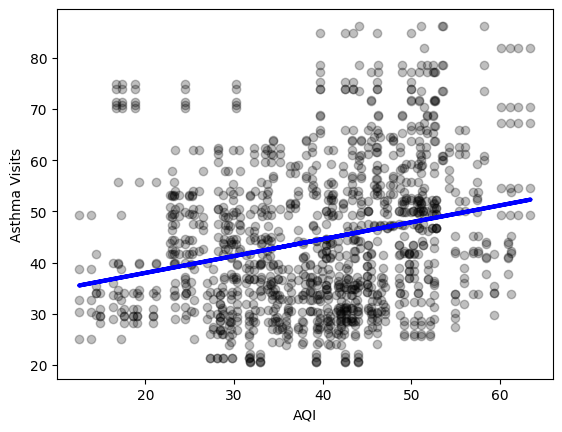

In [315]:
import statsmodels.api as sm

df_hospital_aqi = df_hospital_aqi.dropna(subset=['NormalizedVisits', 'AverageAnnualAQI'])

x = df_hospital_aqi["AverageAnnualAQI"]
y = df_hospital_aqi["NormalizedVisits"]

# In order to have an intercept, we need to add a column of 1's to X
x2 = sm.add_constant(x)

# Fit the simple linear regression
sm_model = sm.OLS(y, x2)
results = sm_model.fit()

# Make predictions using the linear regression
y_pred = results.predict(x2)

# Plot 
plt.scatter(x, y,  color='black', alpha = 0.25)
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.xlabel('AQI')
plt.ylabel('Asthma Visits')
plt.show()

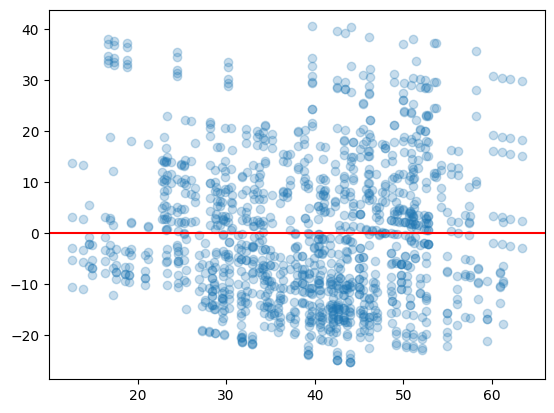

In [316]:
# Enter code here to plot the residuals (Question 7a)
residuals = y - y_pred
plt.scatter(x, residuals, alpha = 0.25)
plt.axhline(y=0, color = 'red')
plt.show()

In [317]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedVisits   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     84.21
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.74e-19
Time:                        15:10:21   Log-Likelihood:                -5177.9
No. Observations:                1275   AIC:                         1.036e+04
Df Residuals:                    1273   BIC:                         1.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.3940      1.472  

In [318]:
# import cjest
df_cjest = pd.read_csv('1.0-communities.csv', low_memory=False)
df_cjest = df_cjest[df_cjest['State/Territory'] == 'California']
# Select only the desired columns
df_cjest = df_cjest[['Census tract 2010 ID', 
                     'County Name', 
                     'State/Territory', 
                     'Percent Black or African American alone', 
                     'Percent American Indian / Alaska Native', 
                     'Percent Asian', 
                     'Percent Native Hawaiian or Pacific', 
                     'Percent two or more races', 
                     'Percent White', 
                     'Percent Hispanic or Latino', 
                     'Percent other races', 
                     'Identified as disadvantaged', 
                     'Percentage of tract that is disadvantaged by area', 
                     'Total population', 
                     'Is low income?', 
                     'Adjusted percent of individuals below 200% Federal Poverty Line (percentile)', 
                     'Adjusted percent of individuals below 200% Federal Poverty Line']]

# Display the resulting dataframe
df_cjest.head()

,Census tract 2010 ID,County Name,State/Territory,Percent Black or African American alone,Percent American Indian / Alaska Native,Percent Asian,Percent Native Hawaiian or Pacific,Percent two or more races,Percent White,Percent Hispanic or Latino,Percent other races,Identified as disadvantaged,Percentage of tract that is disadvantaged by area,Total population,Is low income?,Adjusted percent of individuals below 200% Federal Poverty Line (percentile),Adjusted percent of individuals below 200% Federal Poverty Line
3560,6001400100,Alameda County,California,0.03,0.00,0.12,0.0,0.05,0.74,0.03,0.01,False,0,3120.0,False,0.08,0.01
3561,6001400200,Alameda County,California,0.02,0.00,0.08,0.0,0.09,0.73,0.08,0.00,False,0,2007.0,False,0.12,0.03
3562,6001400300,Alameda County,California,0.09,0.00,0.11,0.0,0.01,0.67,0.06,0.02,False,0,5051.0,False,0.09,0.02
3563,6001400400,Alameda County,California,0.07,0.01,0.10,0.0,0.07,0.63,0.12,0.04,False,0,4007.0,False,0.30,0.12
3564,6001400500,Alameda County,California,0.21,0.00,0.10,0.0,0.15,0.45,0.09,0.02,False,0,4124.0,False,0.23,0.09


In [319]:
!pip install geopandas


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [320]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


aqi_data = pd.read_csv('air_quality_2021.csv')

CA_geo = gpd.read_file('tl_2019_06_cousub.shp')
CA_geo.crs = "EPSG:4326"

CA_geo = CA_geo.merge(aqi_data, left_on='COUNTY_NAME', right_on='County')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

CA_geo.plot(column='AQI', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

ax.set_title('California Air Quality Index (AQI) by County - 2021', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

plt.show()


DataSourceError: Invalid length for entity 3